<a href="https://colab.research.google.com/github/emetcalf-vas/Group19_QM2/blob/main/LouisianaRaceDistributionMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
racedf = pd.read_csv('QM2RaceLouisiana.csv')

In [3]:
racedf = pd.read_csv('QM2RaceLouisiana.csv')
racedf = racedf[['NAME', 'P1_001N', 'P1_004N']]
racedf = racedf.rename(columns={'NAME': 'Area Name', 'P1_001N': 'Total Population', 'P1_004N': 'Total Black or African American Population'})
racedf = racedf.iloc[1:]
racedf = racedf.reset_index(drop=True)

racedf['Total Population'] = pd.to_numeric(racedf['Total Population'])
racedf['Total Black or African American Population'] = pd.to_numeric(racedf['Total Black or African American Population'])

racedf['Proportion of Population: Black or African American'] = (racedf['Total Black or African American Population'] / racedf['Total Population']) * 100

print(racedf.head())

                      Area Name  Total Population  \
0                     Louisiana           4657757   
1      Acadia Parish, Louisiana             57576   
2       Allen Parish, Louisiana             22750   
3   Ascension Parish, Louisiana            126500   
4  Assumption Parish, Louisiana             21039   

   Total Black or African American Population  \
0                                     1464023   
1                                        9989   
2                                        4102   
3                                       30521   
4                                        6013   

   Proportion of Population: Black or African American  
0                                          31.431932    
1                                          17.349243    
2                                          18.030769    
3                                          24.127273    
4                                          28.580256    


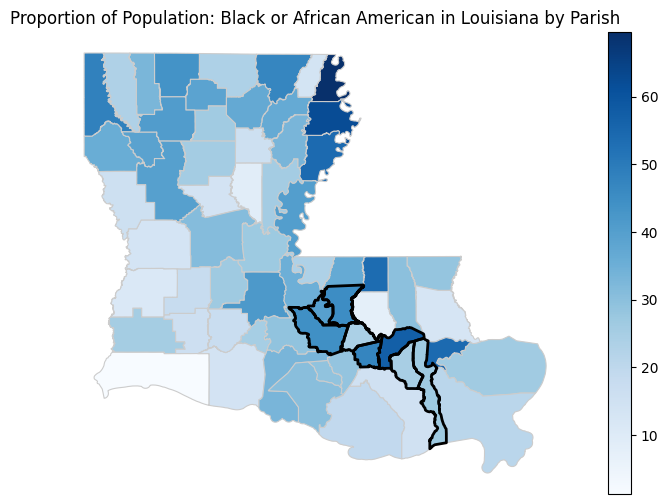

In [17]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


louisiana_shp = gpd.read_file('tl_2023_us_county.shp')
louisiana_shp = louisiana_shp[louisiana_shp['STATEFP'] == '22']

racedf = pd.read_csv('QM2RaceLouisiana.csv')
racedf = racedf[['NAME', 'P1_001N', 'P1_004N']]
racedf = racedf.rename(columns={'NAME': 'Area Name', 'P1_001N': 'Total Population', 'P1_004N': 'Total Black or African American Population'})
racedf = racedf.iloc[1:]
racedf = racedf.reset_index(drop=True)
racedf['Area Name'] = racedf['Area Name'].str.replace(' Parish, Louisiana', '')

racedf['Total Population'] = pd.to_numeric(racedf['Total Population'])
racedf['Total Black or African American Population'] = pd.to_numeric(racedf['Total Black or African American Population'])

racedf['Proportion of Population: Black or African American'] = (racedf['Total Black or African American Population'] / racedf['Total Population']) * 100


louisiana_shp = louisiana_shp.rename(columns={'NAME': 'Area Name'})


merged_data = louisiana_shp.merge(racedf, on='Area Name', how='left')


if merged_data['geometry'].isna().any():
    print("Warning: Missing geometries found. Counties with missing geometries will not be plotted.")
    merged_data = merged_data[~merged_data['geometry'].isna()]

counties_to_outline = ['East Baton Rouge', 'West Baton Rouge', 'Iberville', 'Ascension', 'St. James', 'St. John the Baptist', 'St. Charles', 'Jefferson']
mask = merged_data['Area Name'].isin(counties_to_outline)

variable = 'Proportion of Population: Black or African American'
vmin, vmax = 0, 100
fig, ax = plt.subplots(1, figsize=(10, 6))


merged_data.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                 missing_kwds={'color': 'lightgrey'})


ax.axis('off')


ax.set_title('Proportion of Population: Black or African American in Louisiana by Parish')

merged_data[mask].plot(ax=ax, facecolor='none', edgecolor='black', linewidth=2)
plt.show()
